# Data-Driven Insights for a New Movie Studio
## PHASE TWO PROJECT - GROUP 3

### Authors:
1. Austine Otieno
2. Endalkachew Dessalegne
3. Myrajoy Kiganane
4. Danton Kipngeno
   
### 1. Project Overview

This project focuses on exploratory data analysis to uncover key insights that will inform the strategy of a newly established movie studio. By analyzing film industry data, the goal is to identify trends that contribute to success in film industry. The findings will provide data-driven recommendations to help the studio make informed decisions about the types of films to produce, increasing the likelihood of financial success.
This project uses sqlite3 and Python libraries such as pandas for data manipulation and matplotlib and seaborn for visualization. requires getting an insight into which types of movie genres are successful interms their rating and number of peopel who rated them, that in turn shows us the size of the thier audiens and the profit they can make. It also looked into how runtime of movies, language and region of movies affect their rating and number of votes. The data analysis shows that `Action,Adventure,Sci-Fi` genre has the highest number of votes followed by `Action,Adventure,Fantacy` and `Adventure,Animation,Comedy` genres .`Drama` genre has the highest rating with the highest number of votes followed by `Comedy,Drama` and `Drama,Romance`. This movie genrea are generaly succesful in thier audience size and hence their financial benefit. The data analysis also shows that movies in french language and from US have higher votes and ratings. It also show that runtime of the movies has no effect on the rating and number of votes of movies. 
  
### 1.1. Business Understanding 
#### 1.11.2 Business Problem 

A company has decided to create a new movie studio, but they don’t know anything about creating movies. We have been charged with exploring what types of films are currently doing the best at the box office. We must then translate those findings into actionable insights that the head of the company's new movie studio can use to help decide what type of films to create.

#### 1.1.2. Key Business Questions
* Which Movie Genres have the highest average rating?
* Which Movie Genres have the highest Number of votes?
* What impact does the runtime in minutes has on the average rating and votes?
* How does language influence the average rating and total number of voters of movies?
* How does region influence the number of votes and average ratings of movies?

### 2. Data Understanding

#### 2.1 Data Preprocessing 
#### 2.1.1 The Data 
To ensure comprehensive analysis of the business problem we retrieved data from the IMDB website (https://www.imdb.com/). The IMDB dataset has eight tables and for this particular project we will focus on three tables, namely 'movie_basics', 'movie_ratings' and 'movie_akas'. These three tables share a column 'movie_id' which will be our Primary Key. From 'movie_basics' table we focus on 'Genres' and 'Runtime in Minutes' columns. From  'movie_ratings'  we focus on 'average ratings' and 'number of votes'and from the 'movie_akas' we focus on 'region' and 'language'. The database consists of information about 331,703 movies with start dates ranging from 2010 to 2025.Two or more tables will be joined using 'movie_id' to access information about the genre, start year, run time, average rating, number of votes, language and region about each movie.  

### 2.1.2. Data Preparation
This entails;
* Importing necessary libraries 
* Loading and Accessing of the dataset
* Data Cleaning and preparation which involves: Accessing necessary data for analysis, Handling missing values and Standardizing columns. 

#### 2.1.2.1. Importing necessary libraries  

In [113]:
# importing necessary libraries 
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

import pickle

#### 2.1.2.2. Accessing the Database 

In [114]:
# Connecting to the'im.db' database
conn = sqlite3.connect('im.db')

In [115]:
#accessing tables in the database 
q ='''
SELECT  name 
FROM sqlite_master 
WHERE type='table';
'''
pd.read_sql(q, conn)

name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers

- Our database consists of 8 tables and our project focuses on movie_basics, movie_ratings and movie_akas tables.

- Below, we view the three tables and all their cloumns.

#### 2.1.2.3. Movie_basics table

In [116]:
#Viewing columns in the movie_basics table in the database
q = '''
SELECT *
FROM movie_basics;
'''
movie_basics = pd.read_sql(q, conn)
movie_basics

movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka Ek Din        2019   
2                        The Other Side of the Wind        2018   
3                                   Sabse Bada Sukh        2018   
4                             La Telenovela Errante        2017   
...                                             ...         ...   
146139                          Kuambil Lagi Hatiku        2019   
146140  Rodolpho Teóphilo - O Legado de um Pioneiro        2015   
146141                              Dankyavar Danka        2013   
146142                                       6 Gunn        2017   
146143               Chico Albuquerque - Revelações        2013   

        runtime_minutes                genres  
0                 175.0    Action,Crime,Drama  
1                 114.0       Biography,Drama  
2                 122.0                 Drama  
3                   NaN          Comedy,Drama  
4                  80.0  Comedy,Drama,Fantasy  
...                 ...                   ...  
146139            123.0                 Drama  
146140              NaN           Documentary  
146141              NaN                Comedy  
146142            116.0                  None  
146143              NaN           Documentary  

[146144 rows x 6 columns]


#### 2.1.2.4. Movie_ratings table

In [117]:
#Viewing columns in the movie_ratings table from the database
q = '''
SELECT *
FROM movie_ratings;
'''
movie_ratings = pd.read_sql(q, conn)
movie_ratings

movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]

#### 2.1.2.5. Movie_akas table

In [119]:
#Viewing columns in the movie_akas table from the database
q = '''
SELECT *
FROM movie_akas;
'''
movie_akas = pd.read_sql(q, conn)
movie_akas

movie_id  ordering                                    title region  \
0       tt0369610        10                            Джурасик свят     BG   
1       tt0369610        11                        Jurashikku warudo     JP   
2       tt0369610        12  Jurassic World: O Mundo dos Dinossauros     BR   
3       tt0369610        13                  O Mundo dos Dinossauros     BR   
4       tt0369610        14                           Jurassic World     FR   
...           ...       ...                                      ...    ...   
331698  tt9827784         2                       Sayonara kuchibiru   None   
331699  tt9827784         3                            Farewell Song    XWW   
331700  tt9880178         1                              La atención   None   
331701  tt9880178         2                              La atención     ES   
331702  tt9880178         3                            The Attention    XWW   

       language        types   attributes  is_original_title  
0            bg         None         None                0.0  
1          None  imdbDisplay         None                0.0  
2          None  imdbDisplay         None                0.0  
3          None         None  short title                0.0  
4          None  imdbDisplay         None                0.0  
...         ...          ...          ...                ...  
331698     None     original         None                1.0  
331699       en  imdbDisplay         None                0.0  
331700     None     original         None                1.0  
331701     None         None         None                0.0  
331702       en  imdbDisplay         None                0.0  

[331703 rows x 8 columns]

- *movie_basics*, *movie_ratings* and *movie_akas* tables consit of 146144, 73855 and 331702 rows or entries of movies respectively
- all tables having *movie_id* as a primary-kay or foriegn-key, having varying number of rows indicates that there may be missing and null values 

### 2.1.3. Viewing missing or null values

In [120]:
# viewing null values from momovie_basics table
movie_basics.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [121]:
# viewing null values from momovie_ratings table
movie_ratings.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [122]:
# viewing null values from momovie_akas table
movie_akas.isnull().sum()

movie_id                  0
ordering                  0
title                     0
region                53293
language             289988
types                163256
attributes           316778
is_original_title        25
dtype: int64

- We notice that there are null values in movie_basics and movie_akas tables.
- Using SQL for data extraction and manupilation, we will be dealing with these missing and null values in the queries we write whenever those columns with the null values are envolved

## 3. Data Analysis

* We join *`movie_basics`* and *`movie_rating`* tables to analyse the rating and total number of votes of movie genres
* we analyse the trend in the rating and number of votes of top rated and voted genres over the years
* we analyse the effect of runtime in minutes, language and region in the rating and number of votes 

In [123]:
# join movie_basics and movie_ratings tables
# to remove null values - query contains 'genres is not null'
q = """ 
SELECT movie_id, genres, averagerating, numvotes
FROM movie_basics
   JOIN movie_ratings
   USING(movie_id)
WHERE genres IS NOT NULL
"""
movie_basics_and_ratings = pd.read_sql(q, conn)
movie_basics_and_ratings

movie_id                genres  averagerating  numvotes
0      tt0063540    Action,Crime,Drama            7.0        77
1      tt0066787       Biography,Drama            7.2        43
2      tt0069049                 Drama            6.9      4517
3      tt0069204          Comedy,Drama            6.1        13
4      tt0100275  Comedy,Drama,Fantasy            6.5       119
...          ...                   ...            ...       ...
73047  tt9913056           Documentary            6.2         5
73048  tt9913084           Documentary            6.2         6
73049  tt9914286          Drama,Family            8.7       136
73050  tt9914642           Documentary            8.5         8
73051  tt9916160           Documentary            6.5        11

[73052 rows x 4 columns]

- Joined table gives us the rating and number of votes for each rated movie.

### 3.1. Movie Rating and Number of Votes

#### 3.1.1 Movie Ratings

In [124]:
# top 10 movie genres with highest average rating irrespective of their number of votes
q = """ 
    SELECT genres, AVG(averagerating) AS Avg_averagerating, SUM(numvotes) AS Total_numvotes
      FROM movie_basics
           JOIN movie_ratings
           USING(movie_id)
   GROUP BY genres
  ORDER BY Avg_averagerating DESC, Total_numvotes DESC
     LIMIT 10
    """
genres_top_rate = pd.read_sql(q, conn)
genres_top_rate

genres  Avg_averagerating  Total_numvotes
0   Comedy,Documentary,Fantasy                9.4               5
1   Documentary,Family,Musical                9.3              19
2                History,Sport                9.2               5
3                    Game-Show                9.0               7
4                Music,Mystery                9.0               5
5       Documentary,News,Sport                8.8              25
6            Drama,Fantasy,War                8.8              22
7      Comedy,Drama,Reality-TV                8.8              15
8  Documentary,News,Reality-TV                8.8               8
9                  Drama,Short                8.8               8

- These are movie genres with the highest ratings but their votes(number of people who rated them)
is very low (5-25)
- These high ratings, with minimum number of voters, are of less or no significance to evaluate success of the movies
- Thus, we evaluate movie success based on number of votes and ratings combined 

#### 3.1.2. Genres with highest number of votes and ratings

In [125]:
# top 10 movie genres with highest number of votes and average rating 
q = """ 
    SELECT genres, SUM(numvotes) AS Total_numvotes, AVG(averagerating) AS Avg_averagerating
      FROM movie_basics
           JOIN movie_ratings
           USING(movie_id)
  GROUP BY genres
  ORDER BY Total_numvotes DESC, Avg_averagerating DESC
     LIMIT 10
    """
genres_top_vote_and_rate = pd.read_sql(q, conn)
genres_top_vote_and_rate

genres  Total_numvotes  Avg_averagerating
0     Action,Adventure,Sci-Fi        23023248           5.655906
1    Action,Adventure,Fantasy         9658883           5.371845
2  Adventure,Animation,Comedy         8687435           5.936555
3                       Drama         8395521           6.494265
4        Comedy,Drama,Romance         7665463           6.292467
5     Action,Adventure,Comedy         7256686           5.554032
6                      Comedy         6832037           5.777998
7                Comedy,Drama         6462839           6.364119
8          Action,Crime,Drama         5563553           5.989146
9               Drama,Romance         5542760           6.294305

#### 3.1.3. Visualization of movie genres with highest number of votes

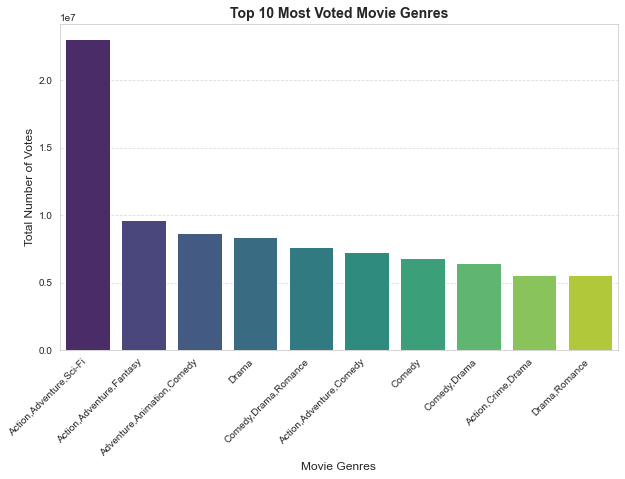

In [126]:
# plot bar graph of top ten genres of movies with highest total number of votes
# Set figure size for better visibility
plt.figure(figsize=(10, 6))

# Use a more appealing color palette
sns.barplot(
    x=genres_top_vote_and_rate['genres'], 
    y=genres_top_vote_and_rate['Total_numvotes'], 
    palette="viridis"
)
# Add labels and title with improved formatting
plt.xlabel('Movie Genres', fontsize=12)
plt.ylabel('Total Number of Votes', fontsize=12)
plt.title('Top 10 Most Voted Movie Genres', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

* `Action,Adventure,Sci-Fi` genre has the highest number of votes followed by `Action,Adventure,Fantacy`
  and `Adventure,Animation,Comedy` genres .
* `Drama,Romance` genre has the lowest votes among the top 10 highest voted.

#### 3.1.4. Visualization of movie genres with highest average ratings

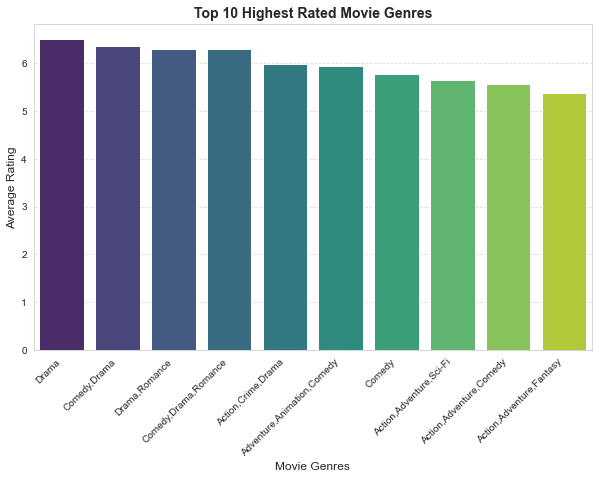

In [127]:
# Sort data by average rating in descending order
sorted_data = genres_top_vote_and_rate.sort_values(by='Avg_averagerating', ascending=False)

# Set figure size for better visibility
plt.figure(figsize=(10, 6))

# Use a more appealing color palette
sns.barplot(
    x=sorted_data['genres'], 
    y=sorted_data['Avg_averagerating'], 
    palette="viridis"
)

# Add labels and title with improved formatting
plt.xlabel('Movie Genres', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.title('Top 10 Highest Rated Movie Genres', fontsize=14, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

* `Drama` genre has the highest rating based on the top ten genres with the highest number of votes
  followed by `Comedy,Drama` and `Drama,Romance`.
* `Action,Adventure,Fantasy` genre has the lowest rating among the top 10 highest rated genres.
* All top 10 genres have ratings in the range between 5.4 and 6.5.

### 3.2. Movie genre ratings and number of votes over the years

#### 3.2.1. Top five movie genres - votes and ratings over the years

In [128]:
# Total number of votes and ratings of top 5 movies over the years
q = """ 
    SELECT genres, start_year, SUM(numvotes) AS Total_numvotes, AVG(averagerating) AS Avg_averagerating
      FROM movie_basics
           JOIN movie_ratings
           USING(movie_id)
    WHERE genres IS NOT NULL
  GROUP BY genres, start_year
    HAVING genres == 'Action,Adventure,Sci-Fi' OR genres =='Action,Adventure,Fantasy' OR genres == 'Adventure,Animation,Comedy' OR genres == 'Drama' OR genres =='Comedy,Drama,Romance'
  ORDER BY genres, Total_numvotes DESC;
 
    """
genres_votes_over_years = pd.read_sql(q, conn)
genres_votes_over_years.head()

genres  start_year  Total_numvotes  Avg_averagerating
0  Action,Adventure,Fantasy        2017         2171754           5.575000
1  Action,Adventure,Fantasy        2016         2124337           6.292308
2  Action,Adventure,Fantasy        2011         1650970           4.780000
3  Action,Adventure,Fantasy        2015          883563           5.033333
4  Action,Adventure,Fantasy        2010          828729           6.216667

In [129]:
## Top Rating movies and their number of votes 

In [130]:
# top 10 movie genres with highest number of votes and average rating 
q = """ 
    SELECT genres, AVG(averagerating) AS Avg_averagerating, SUM(numvotes) AS Total_numvotes
      FROM movie_basics
           JOIN movie_ratings
           USING(movie_id)
   GROUP BY genres
  ORDER BY Avg_averagerating DESC, Total_numvotes DESC
     LIMIT 10
    """
genres_top_rate = pd.read_sql(q, conn)
genres_top_rate

genres  Avg_averagerating  Total_numvotes
0   Comedy,Documentary,Fantasy                9.4               5
1   Documentary,Family,Musical                9.3              19
2                History,Sport                9.2               5
3                    Game-Show                9.0               7
4                Music,Mystery                9.0               5
5       Documentary,News,Sport                8.8              25
6            Drama,Fantasy,War                8.8              22
7      Comedy,Drama,Reality-TV                8.8              15
8  Documentary,News,Reality-TV                8.8               8
9                  Drama,Short                8.8               8

- Genres with highest rating hava th

#### 3.2.2. Visualization of number votes of top five movie genres over time 

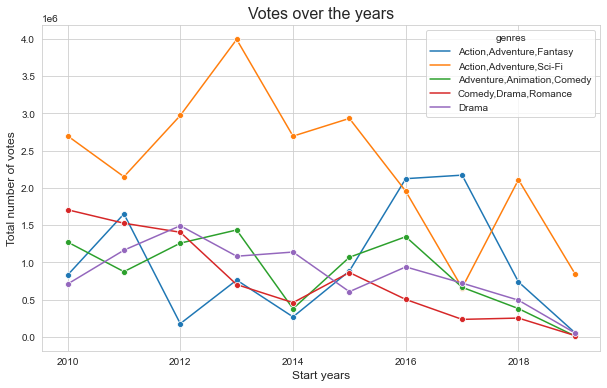

In [131]:
# plot top 5 genres and total number of voters over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data= genres_votes_over_years, x='start_year', y='Total_numvotes', hue='genres', marker='o')

# Add labels and title with improved formatting
plt.title('Votes over the years', fontsize=16)
plt.xlabel('Start years', fontsize=12)
plt.ylabel('Total number of votes', fontsize=12)
plt.grid(True)
plt.legend(title='genres')
plt.show()

- Visualization above displays the total number of votes over the years from the year 2010 to the year 2019.
  We can observe that number of votes have been decreasing gradually over the years.
- `Action,Adventure,Sci-Fi` genre is with the highest number of votes over the years.

#### 3.2.3. Visualization of average ratings of top five movie genres over the years

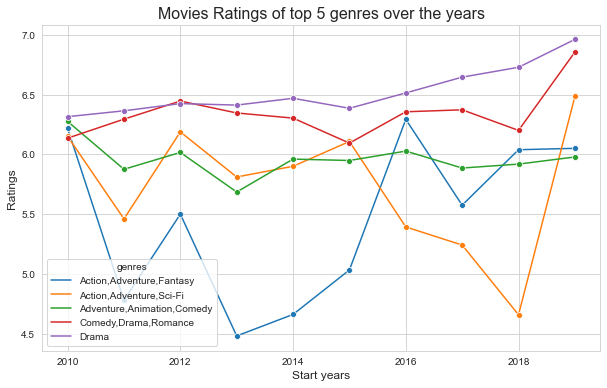

In [132]:
# plot ratings of top 5 genres over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data= genres_votes_over_years, x='start_year', y='Avg_averagerating', hue='genres', marker='o')

plt.title('Movies Ratings of top 5 genres over the years', fontsize=16)
plt.xlabel('Start years', fontsize=12)
plt.ylabel('Ratings', fontsize=12)
plt.grid(True)
plt.legend(title='genres')
plt.show()

* From the above visualization, we can observe that:
- There is a general trend of increase in the rating of most of the genres.
- `Drama` genre has the highest and increased rating over the years followed by `commedy,Drama,Romance` and  `Adventure,Animation,comedy`genres.
- `Action,Adventure,Sci-Fi` and `Action,Adventure,Fantacy` genres had fluctuating ratings over the years.

### 3.3. Runtime of movies and effect on votes and ratings

In [133]:
# check if there is effect of runtime of movies on rating and votes
# join movie_basics and movie_ratings tables
q = """ 
    SELECT AVG(runtime_minutes) AS Avg_runtime_minutes, SUM(numvotes) AS Total_numvotes, AVG(averagerating) AS Avg_rating
      FROM movie_basics
           JOIN movie_ratings
           USING(movie_id)
    WHERE runtime_minutes IS NOT NULL
    GROUP BY genres
  ORDER BY Total_numvotes DESC, Avg_rating DESC
    """
movie_runtime = pd.read_sql(q, conn)
movie_runtime

Avg_runtime_minutes  Total_numvotes  Avg_rating
0             108.569106        23023053    5.668293
1             108.320000         9658805    5.336000
2              88.448718         8687201    5.944444
3              97.633723         8342370    6.485779
4             100.415876         7662618    6.288870
..                   ...             ...         ...
902            87.000000               6    2.800000
903            70.000000               5    9.400000
904            74.000000               5    6.400000
905           105.000000               5    6.400000
906            78.000000               5    4.400000

[907 rows x 3 columns]

- From the above table we can see that the top 10 movie genres with highest votes
  
  and ratings have an average runtime between 88.4 and 108.6 minutes 


### 3.3.1. Correlation between Average runtime, number of votes and avarage rating

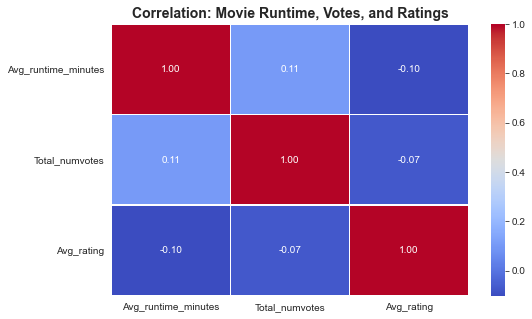

In [134]:
# Compute correlation matrix
correlation_matrix = movie_runtime[['Avg_runtime_minutes', 'Total_numvotes', 'Avg_rating']].corr()

plt.figure(figsize=(8, 5))

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title("Correlation: Movie Runtime, Votes, and Ratings", fontsize=14, fontweight="bold")

# Show plot
plt.show()

**We can observe:**
- correlation of 0.11 between the **`total number of votes`** and **`average runtime`** which indicates a `weak positive` relationship.
- correlation of -0.07 between the **`total number of votes`** and **`average rating`** which indicates a `weak negative` relationship
- correlation of -0.10 between the **`average rating`** and **`average runtime`** which indicates a `weak negative` relationship.
- Generally there is a week or correlation between movie runtime and number of votes and ratings. 

### 3.4. Movie languages and ratings and number of votes

In [135]:
# check effect of language on the rating and number of votes of movies
q = '''
SELECT language, SUM(numvotes) AS Total_numvotes, AVG(averagerating) AS Avg_averagerating
      FROM movie_akas
           JOIN movie_ratings
           USING(movie_id)
     WHERE language IS NOT NULL
  GROUP BY language
  ORDER BY Total_numvotes DESC, Avg_averagerating DESC
  LIMIT 10
'''

movie_language = pd.read_sql(q, conn)
movie_language

language  Total_numvotes  Avg_averagerating
0       fr       231092513           6.413583
1       tr       212375744           6.179227
2       bg       211275380           6.248951
3       en       209264624           6.269339
4       he       183490289           6.537221
5       fa        28314980           6.166087
6      cmn        18428732           5.834505
7       hr        16425337           5.851701
8       ca        15852436           6.762882
9       sv        15698475           6.811809

#### 3.4.1. Visualization of effect of movie language on rating and total number of voters of movies

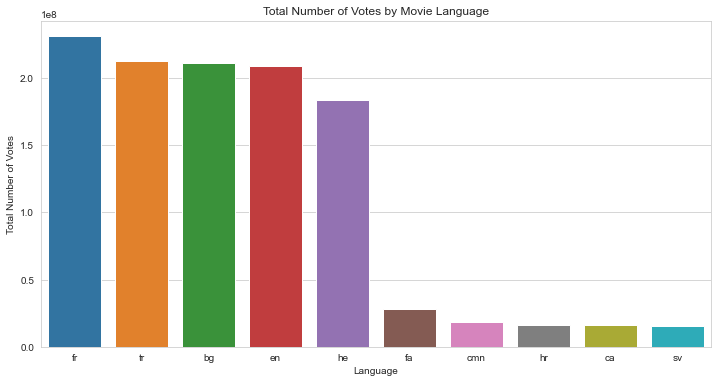

In [136]:
plt.figure(figsize=(12, 6))
sns.barplot(x='language', y='Total_numvotes', data=movie_language, ci=None)
#plt.xticks(rotation=90)  # Rotate labels for readability
plt.xlabel("Language")
plt.ylabel("Total Number of Votes")
plt.title("Total Number of Votes by Movie Language")
plt.show()


- Movies in **French language** have the highest votes followed by **Turkish** and **Bulgarian**.
- We have movies with swedish language with the lowest number of votes.

### 3.4.2. Chi-square to test if movie language affects ratings

To determine if ratings vary by language, we used Chi-Square Which is designed to test 
relationships between categorical variables hence great for our task.
#### Hypothesis testing
##### Null Hypothesis (H₀):
There is no difference in ratings of movies in different languages.
##### Alternative Hypothesis (H₁):
There is difference in ratings of movies in different languages.

In [137]:
# we use chi-square to test the hypothesis

#import necessary library
from scipy.stats import chi2_contingency

# Categorize ratings
bins = [0, 6.5, 7.5, 10]
labels = ['Low', 'Medium', 'High']
movie_language['Rating_Category'] = pd.cut(movie_language['Avg_averagerating'], bins=bins, labels=labels)

# Create a contingency table
contingency_table = pd.crosstab(movie_language['language'], movie_language['Rating_Category'])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat:.2f}, p-value: {p_value:.4f}")

Chi-Square Statistic: 10.00, p-value: 0.3505


- With 95% significance level(alpha = 0.05), since P-value(0.3505) is greater than 0.05, we fail to reject the null hypothesis. This means that the relationship between movie language and ratings is not statistically significant. 

### 3.5. Regions and ratings and number of votes

In [138]:
# check effect of region on the rating and number of votes of movies
q = '''
    SELECT region AS movie_region, SUM(numvotes) AS Total_numvotes, AVG(averagerating) AS Avg_averagerating
      FROM movie_ratings 
           LEFT JOIN movie_akas
           USING(movie_id)
    WHERE region IS NOT NULL
  GROUP BY region
  ORDER BY Total_numvotes DESC, Avg_averagerating DESC
  LIMIT 10;
'''
movie_region = pd.read_sql(q, conn)
movie_region

movie_region  Total_numvotes  Avg_averagerating
0           US       418957631           6.218606
1           GR       314020162           6.418054
2           ES       259269856           6.298747
3           RU       253657614           6.114330
4           BR       242543329           6.188029
5           CA       240139452           6.358648
6           PL       227107093           6.342997
7           HU       221576907           6.315188
8           PT       219949216           6.306735
9           RS       216622549           6.411964

### 3.5.1. Visualization of impact of movie region on effect ratingsabs and total number of voters

<Figure size 864x432 with 0 Axes>

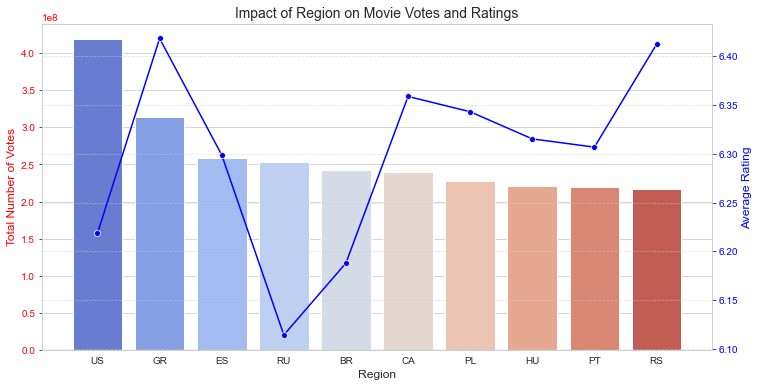

In [139]:
# plot bar graph and line graph on the same axsis to show impact of 
# movie region on ratings and total number of votes

plt.figure(figsize=(12, 6))

# Sort data by votes for better visualization
movie_region = movie_region.sort_values(by="Total_numvotes", ascending=False)

# Create a twin-axis plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot total votes (bar chart)
sns.barplot(
    x="movie_region", y="Total_numvotes", data=movie_region, palette="coolwarm", ax=ax1
)
ax1.set_ylabel("Total Number of Votes", color="red", fontsize=12)
ax1.set_xlabel("Region", fontsize=12)
ax1.tick_params(axis="y", labelcolor="red")

# Create a second y-axis for average ratings
ax2 = ax1.twinx()
sns.lineplot(
    x="movie_region", y="Avg_averagerating", data=movie_region, color="blue", marker="o", ax=ax2
)
ax2.set_ylabel("Average Rating", color="blue", fontsize=12)
ax2.tick_params(axis="y", labelcolor="blue")

# Title and layout
plt.title("Impact of Region on Movie Votes and Ratings", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

- From the above visualization we can observe that United states has the highest number of votes and the highest number of rating followed by Greece.
- Russia has the lowest avarage rating.
- Republic of Serbia has the lowest number of votes overal.

## 4. Analysis Summary

Our analysis process included:
- 1. Exploratory Data Analysis (EDA): We examined various film attributes, such as genres, ratings, votes, languages, and regions, to uncover patterns and trends in the film industry.

- 2. Visualization and Insights: Through data visualization techniques, we identified key findings and trends in the industry, which were then translated into actionable recommendations.

- 3. Statistical Analysis: We applied correlation analysis and hypothesis testing to determine relationships between film attributes such as runtime, language, and popularity.

## 5. Key Findings

Our analysis revealed several characteristics of films that tend to perform well at the box office:

#### Genre Trends:

- **Drama** movies have the highest rating among the top ten genres with the highest number of votes, followed by **Comedy,Drama**, and **Drama,Romance**.

- The **Action,Adventure,Sci-Fi** genre has the highest number of votes, followed by **Action,Adventure,Fantasy** and **Adventure,Animation,Comedy**. These genres have a strong audience base, indicating their popularity in mainstream cinema.

#### Runtime and Popularity:

- There is a very weak positive correlation (0.10) between the total number of votes and average runtime, and very weak negative correlation (-0.07) between average rating and average runtime.
- This suggests that runtime of movies as little or no effect on ratings or number of votes. 
### Language Preference:

Movies in the French language have received the highest number of votes (231,092,513), followed by Turkish and Bulgarian films. This suggests that French-language films have a wider global reach or a highly engaged audience.

### Regional Popularity:

- Movies form United States have the highest number of votes and ratings, reflecting its dominance in global cinema.

- Surprisingly, Greece ranks second, indicating a strong movie-watching culture or high engagement from Greek audiences.


## 6. Recommendations

Based on our findings, we suggest the following strategies for the studio:

**1. Genre Selection for High Engagement**
- Focus on producing or promoting Drama, Comedy, and Romance films, as they receive the highest ratings with high number of votes.

- **Action,Adventure,Sci-Fi**, **Action,Adventure,Fantacy** and **Adventure,Animation,Comedy** genres attract the most votes, which inturn means the highest global audience, making them ideal for blockbuster-style films targeting a broad audience.

- Consider blending elements of popular genres (e.g., Action-Drama or Sci-Fi-Romance) to appeal to both high-rating and high-vote segments.

**2. Language and Market Expansion**

- Given the high number of votes for French, Turkish, and Bulgarian films, production companies should consider dubbing or subtitling in these languages to increase global reach.

- Investing in regional language content can help tap into underrepresented but highly engaged audiences.

**3. Target High-Engagement Markets**
- The United States leads in votes, making it a key market for movie releases.

- The strong Greek audience engagement suggests opportunities for localized content, marketing campaigns, and regional streaming services.


## 7. Summary 

Our analysis of the movie industry data has provided valuable insights that can guide the strategic decisions of the new movie studio. We identified the most popular genres based on average ratings and total votes, revealing that Drama movies tend to receive the highest ratings, while Action, Adventure, and Sci-Fi films attract the most votes. Understanding these trends will help the studio choose movie genres that are both critically acclaimed and commercially successful. Additionally, we examined how factors like movie runtime, language, and region impact ratings and votes. 

By focusing on high-performing genres and considering factors like language and audience preferences, the new studio can increase its chances of success in a competitive industry